# **The Sparks Foundation** 

**Author : Hetvi Shah**

# Task 3- Exploratory Data Analysis - Retail

> Perform ‘Exploratory Data Analysis’ on the given dataset. As a business manager, try to find out the weak areas where you can
work to make more profit.



In [ ]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Laoding the Dataset
Retail_df = pd.read_csv('/content/SampleSuperstore.csv')
Retail_df.head() #Print first 5 rows of our dataset

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Basic Data Exploration

In [ ]:
Retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


Hence, we can conclude that


---


*   We have a total of 13 columns and 9994 rows in our dataframe.
*   "Postal Code" is of the type integer an hence, has to be converted into String







In [ ]:
Retail_df['Postal Code']  = Retail_df['Postal Code'].astype(str) #Converting into a String 

In [ ]:
Retail_df.isnull().sum() #To check for any missing values

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [ ]:
#Check for duplicate data
duplicate = Retail_df.duplicated()
print(duplicate.sum())

17


We have 17 duplicate records in the data, we will remove this from the data set so that we get only distinct records

In [ ]:
Retail_df.drop_duplicates(inplace=True) #Remove duplicate values


In [ ]:
Retail_df.describe()  #See how our data has been spread for numerical values.


,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.00000
mean,230.148902,3.790719,0.156278,28.69013
std,623.721409,2.226657,0.206455,234.45784
min,0.444000,1.000000,0.000000,-6599.97800
25%,17.300000,2.000000,0.000000,1.72620
50%,54.816000,3.000000,0.200000,8.67100
75%,209.970000,5.000000,0.200000,29.37200
max,22638.480000,14.000000,0.800000,8399.97600


# Handling Outliers

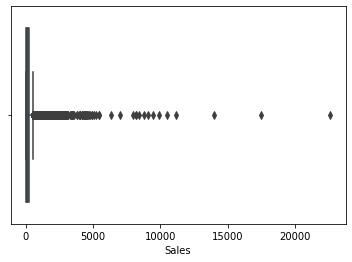

In [ ]:
sns.boxplot(x= Retail_df["Sales"])


In such a distribution, removing all the outliers will lead to a biased distribution of data. Hence we would only remove the last 0.001 percent of the data.


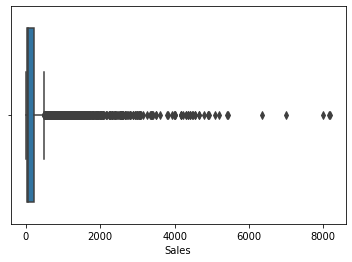

In [ ]:
def Remove_Outliers(df,col,lower_quantile, upper_quantile):
  lower = df[col].quantile(lower_quantile)
  upper = df[col].quantile(upper_quantile)
  df_new = df.loc[(df[col]> lower)&(df[col] < upper)]
  return df_new

Retail_df = Remove_Outliers(Retail_df,'Sales',0,0.999)
sns.boxplot(x= Retail_df['Sales'])

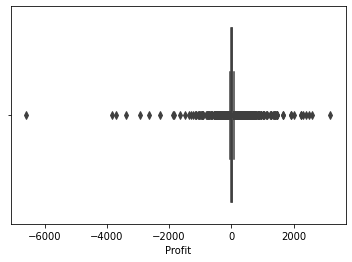

In [ ]:
sns.boxplot(x= Retail_df['Profit']) #Checking the boxplot for Profit

Here we would remove the initial and final 0.001% of the data

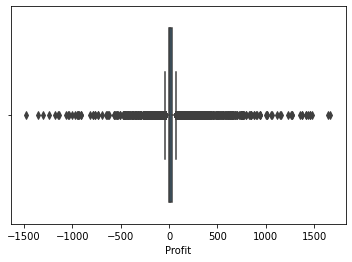

In [ ]:
Retail_df = Remove_Outliers(Retail_df,'Profit',0.001,0.999)
sns.boxplot(x= Retail_df['Profit'])

# Data Analysis

# Analysis 1: 
Analyzing the Sales and Profit for various ship modes





In [ ]:
print("Types of Ship Modes in the DataFrame :", Retail_df['Ship Mode'].unique())

Types of Ship Modes in the DataFrame : ['Second Class' 'Standard Class' 'First Class' 'Same Day']


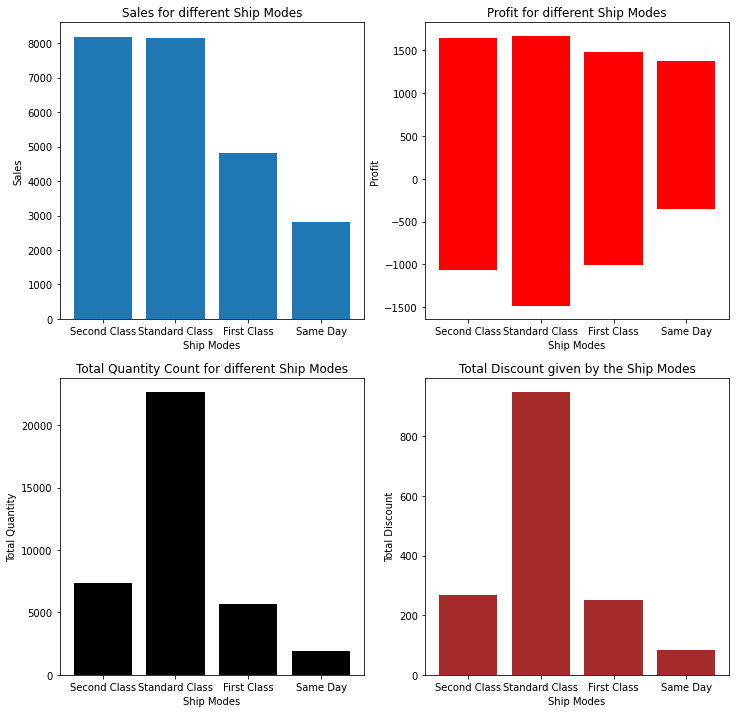

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(12,12)) #The subplot has 2 rows and 2 columns

#Plotting Ship Mode VS Sales
ax[0,0].bar(Retail_df['Ship Mode'], Retail_df['Sales'])
ax[0,0].set_title('Sales for different Ship Modes')
ax[0,0].set_xlabel('Ship Modes')
ax[0,0].set_ylabel('Sales')

#Plotting Ship Mode VS Profit
ax[0,1].bar(Retail_df['Ship Mode'], Retail_df['Profit'],color = 'r')
ax[0,1].set_title('Profit for different Ship Modes')
ax[0,1].set_xlabel('Ship Modes')
ax[0,1].set_ylabel('Profit')

#Plotting the total quantity of items sold for each ship mode
Quantity = [0]*4
Quantity[0] = np.sum(Retail_df['Quantity'][Retail_df['Ship Mode']== 'Second Class'])
Quantity[1] = np.sum(Retail_df['Quantity'][Retail_df['Ship Mode']== 'Standard Class'])
Quantity[2] = np.sum(Retail_df['Quantity'][Retail_df['Ship Mode']== 'First Class'])
Quantity[3] = np.sum(Retail_df['Quantity'][Retail_df['Ship Mode']== 'Same Day'])

ax[1,0].bar(Retail_df['Ship Mode'].unique(), Quantity, color = 'k')
ax[1,0].set_title('Total Quantity Count for different Ship Modes')
ax[1,0].set_xlabel('Ship Modes')
ax[1,0].set_ylabel('Total Quantity')

#Plotting the total discount given on items sold for each ship mode
Discount = [0]*4
Discount[0] = np.sum(Retail_df['Discount'][Retail_df['Ship Mode']== 'Second Class'])
Discount[1] = np.sum(Retail_df['Discount'][Retail_df['Ship Mode']== 'Standard Class'])
Discount[2] = np.sum(Retail_df['Discount'][Retail_df['Ship Mode']== 'First Class'])
Discount[3] = np.sum(Retail_df['Discount'][Retail_df['Ship Mode']== 'Same Day'])

ax[1,1].bar(Retail_df['Ship Mode'].unique(), Discount, color = '#A52A2A')
ax[1,1].set_title('Total Discount given by the Ship Modes')
ax[1,1].set_xlabel('Ship Modes')
ax[1,1].set_ylabel('Total Discount')

  
plt.show()

**Conclusion**

> Hence, we can conclude that most of the buyers chose Standard Class as their shipping option, but the sales and profits generated for the Standard Class is almost the same as the Second Class. This is because of the high discount given on the Shipping Class.



# Analysis 2
What Ship modes are preferred by each Segment

In [ ]:
print("Segment consists of categories :", Retail_df['Segment'].unique())

Segment consists of categories : ['Consumer' 'Corporate' 'Home Office']


In [ ]:
count = []
percentage = []
segment = []
for i in Retail_df['Segment'].unique():
  for j in Retail_df['Ship Mode'].unique():
    length = Retail_df[(Retail_df['Segment']==i) & (Retail_df['Ship Mode']== j)].shape[0]
    percentage.append((length/Retail_df[Retail_df['Segment']==i].shape[0])*100)
  count.append(percentage)
  percentage = []

for i in Retail_df['Segment'].unique():
  length = Retail_df[Retail_df['Segment'] == i].shape[0]
  segment.append((length/Retail_df.shape[0])*100)

5165
3008
1773


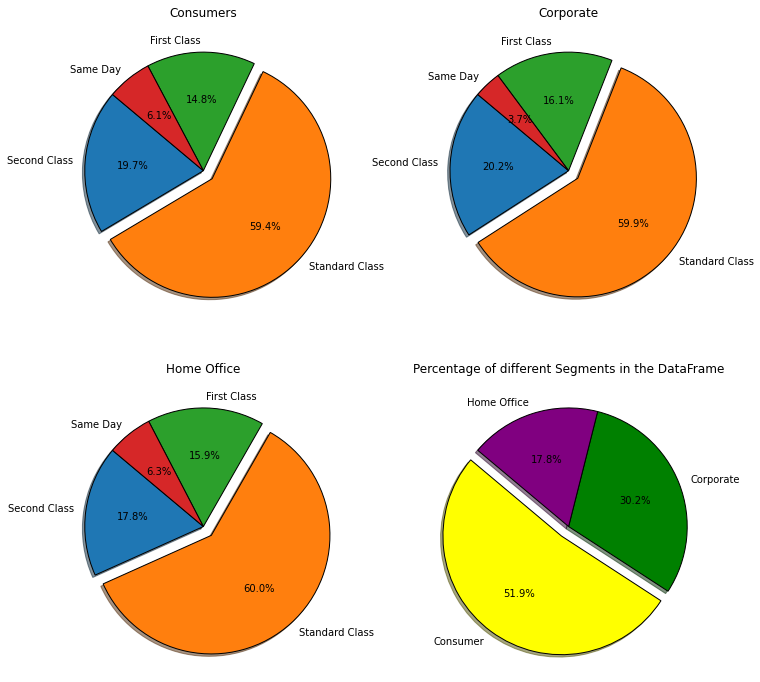

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(12,12)) #The subplot has 2 rows and 2 columns

#Pie chart for Consumers Segment
ax[0,0].pie(count[0],labels = Retail_df['Ship Mode'].unique(),explode = (0,0.1,0,0),autopct='%1.1f%%', shadow=True, 
            startangle=140,wedgeprops={"edgecolor":"0",'linewidth': 1,'linestyle': '-', 'antialiased': True})
ax[0,0].set_title('Consumers')

#Pie Chart for Corporate Segment
ax[0,1].pie(count[1],labels = Retail_df['Ship Mode'].unique(),explode = (0,0.1,0,0),autopct='%1.1f%%', shadow=True,
            startangle=140,wedgeprops={"edgecolor":"0",'linewidth': 1,'linestyle': '-', 'antialiased': True})
ax[0,1].set_title('Corporate')

#Pie Chart for Home Office Segment
ax[1,0].pie(count[2],labels = Retail_df['Ship Mode'].unique(),explode = (0,0.1,0,0) ,autopct='%1.1f%%', shadow=True,
            startangle=140,wedgeprops={"edgecolor":"0",'linewidth': 1,'linestyle': '-', 'antialiased': True})
ax[1,0].set_title('Home Office')


ax[1,1].pie(segment,labels = Retail_df['Segment'].unique() ,autopct='%1.1f%%', shadow=True,
            colors = ['yellow','green','purple'],startangle=140,explode = (0.1,0,0),wedgeprops={"edgecolor":"0",'linewidth': 1,
          'linestyle': '-', 'antialiased': True})
ax[1,1].set_title('Percentage of different Segments in the DataFrame')

plt.show()

Conclusion

> As seen above, more than 50% buyers in each segment preferred Standard class as their shipping mode.



# Analysis 3
Which Category had the highest Sale. Which category showed the highest profit and the highest loss.

In [ ]:
category = Retail_df['Category'].unique()
print("The DataFrame is mainly divided in to ", category, 'categories')

The DataFrame is mainly divided in to  ['Furniture' 'Office Supplies' 'Technology'] categories


In [ ]:
sales = []
profit = []
loss  = []
temp = []
for i in category:
  sales.append(np.sum(Retail_df['Sales'][Retail_df['Category']== i]))
  profit.append(np.sum(Retail_df['Profit'][(Retail_df['Category']== i) & (Retail_df['Profit']>0)]))
  loss.append(np.sum(Retail_df['Profit'][(Retail_df['Category']== i) & (Retail_df['Profit']<0)])*-1)

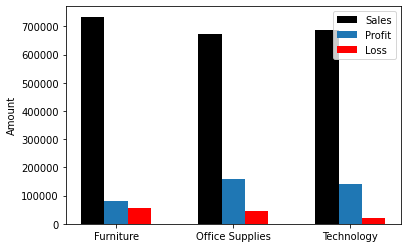

In [ ]:
x= np.arange(3)
plt.bar(x-0.2, sales,color = 'k',width = 0.2)
plt.bar(x, profit, width = 0.2)
plt.bar(x+0.2, loss,width=0.2,color='r')
plt.xticks(x, ['Furniture', 'Office Supplies', 'Technology'])
plt.ylabel("Amount")
plt.legend(["Sales", "Profit", "Loss"])
plt.show()

[21949.1783, 114064.36439999999, 119619.1815]

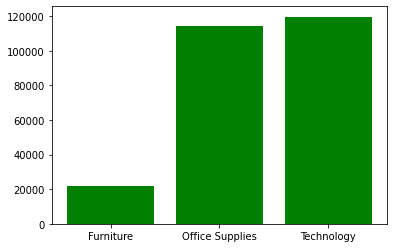

In [ ]:
#Net Profit/Loss
net = []
for i in range(3):
  net.append(Amount[i][1]  - Amount[i][2])
plt.bar(category, net, color = 'g')
plt.plot()
net

Plotting the distribution curve for the Sales of each category

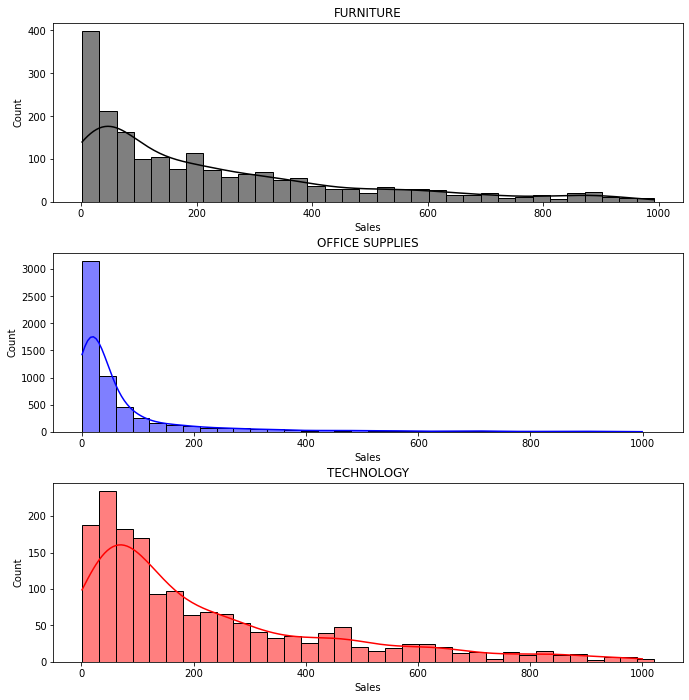

In [ ]:
f, [ax,ax1,ax2] = plt.subplots(3,figsize=(10,10))
f.tight_layout(pad=3.0)
sns.histplot(ax= ax,data = Retail_df['Sales'][(Retail_df['Sales']<1000) & (Retail_df['Category']=='Furniture')],kde = True,binwidth=30, color = 'k').set_title('FURNITURE')

sns.histplot(ax= ax1,data = Retail_df['Sales'][(Retail_df['Sales']<1000) & (Retail_df['Category']=='Office Supplies')],kde = True,binwidth=30, color = 'b').set_title('OFFICE SUPPLIES')
sns.histplot(ax= ax2,data = Retail_df['Sales'][(Retail_df['Sales']<1000) & (Retail_df['Category']=='Technology')],kde = True,binwidth=30, color = 'r').set_title('TECHNOLOGY')
plt.show()

Plotting the distribution curve for the Profit/Loss generated for each category

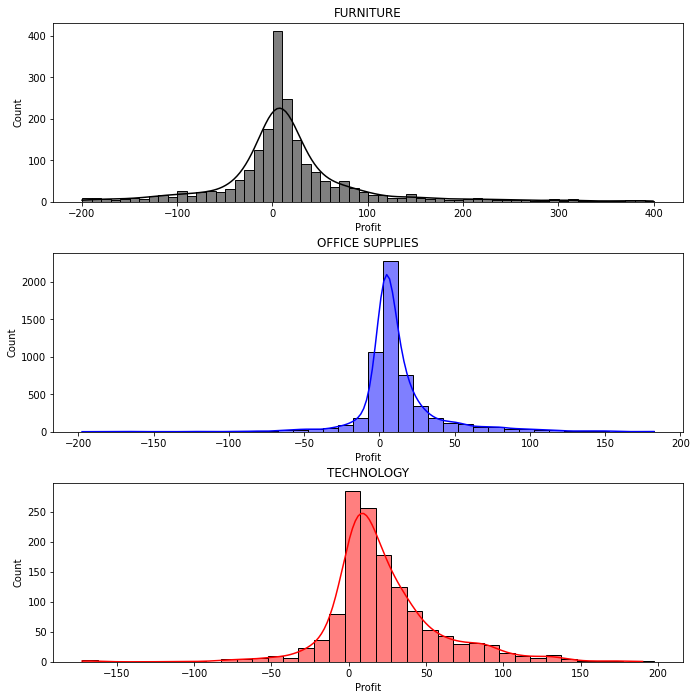

In [ ]:
f, [ax,ax1,ax2] = plt.subplots(3,figsize=(10,10))
f.tight_layout(pad=3.0)
sns.histplot(ax= ax,data = Retail_df['Profit'][(Retail_df['Profit']<400) & (Retail_df['Profit']>-200) & (Retail_df['Category']=='Furniture')],kde = True,binwidth=10, color = 'k').set_title('FURNITURE')

sns.histplot(ax= ax1,data = Retail_df['Profit'][(Retail_df['Sales']<400) & (Retail_df['Profit']>-200) & (Retail_df['Category']=='Office Supplies')],kde = True,binwidth=10, color = 'b').set_title('OFFICE SUPPLIES')
sns.histplot(ax= ax2,data = Retail_df['Profit'][(Retail_df['Sales']<400) & (Retail_df['Profit']>-200) & (Retail_df['Category']=='Technology')],kde = True,binwidth=10, color = 'r').set_title('TECHNOLOGY')
plt.show()

# Analysis 4
Correlation of Region with other variables

We would like to have a look on how are region and sales correlated

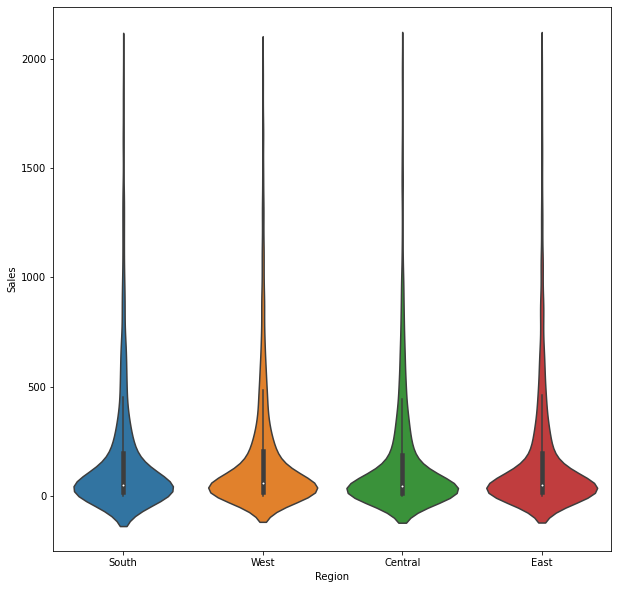

In [ ]:
#the violin plot features a kernel density estimation of the underlying distribution

#Violin plot for Sales in each region
plt.figure(figsize=(10,10))
sns.violinplot(x=Retail_df['Region'],y= Retail_df['Sales'][Retail_df['Sales']<2000])

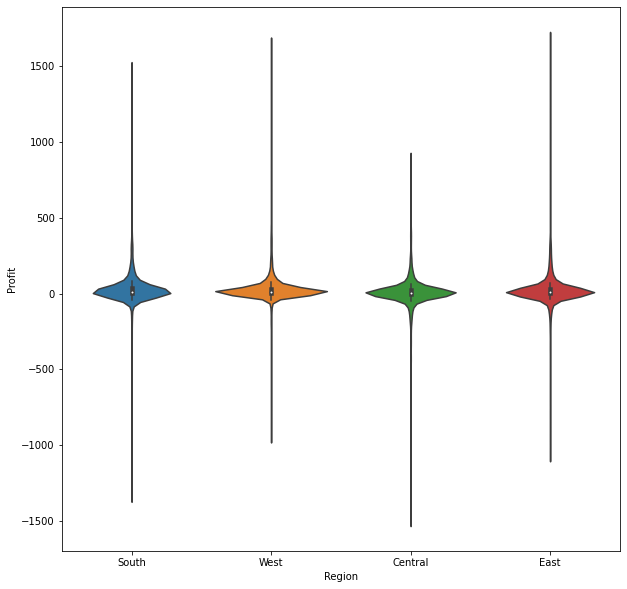

In [ ]:
#Violin plot for Profit generated in each region
plt.figure(figsize=(10,10))
sns.violinplot(x=Retail_df['Region'],y= Retail_df['Profit'])

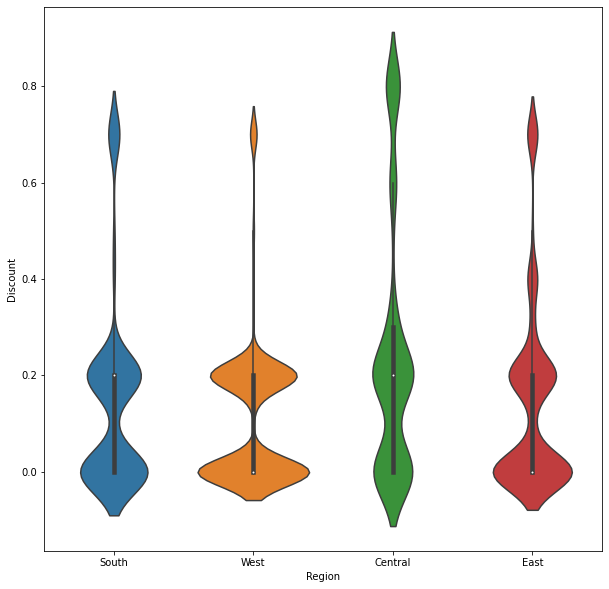

In [ ]:
#Violin plot for Discount in each region
plt.figure(figsize=(10,10))
sns.violinplot(x=Retail_df['Region'],y= Retail_df['Discount'])

Conclusion

> Hence, we can see that the highest profits are generated in the East and West Regions. The Sales in all the regions is almost the same. An interesting trend is seen in the discount plot. It is evident that the Central region gives the highest discount therby generating low profits.



# Analysis 5
Visualizing the sales and profit genrated for each state

In [ ]:
Mean_df = Retail_df.groupby('State',as_index=False)
Mean_df = Mean_df.mean()
#new.reset_index()
Mean_df['State'] = Mean_df['State'].astype(str)



In [ ]:
def convert_state_name(name):
    cd=str(name)
    us_state_abbrev = {
    "Alabama":"AL",
    "Alaska":"AK",
    "Arizona":"AZ",
    "Arkansas":"AR",
    "California":"CA",
    "Colorado":"CO",
    "Connecticut":"CT",
    "Delaware":"DE",
    "District of Columbia" : "DC",
    "Washington DC":"DC",
    "Florida":"FL",
    "Georgia":"GA",
    "Hawaii":"HI",
    "Idaho":"ID",
    "Illinois":"IL",
    "Indiana":"IN",
    "Iowa":"IA",
    "Kansas":"KS",
    "Kentucky":"KY",
    "Louisiana":"LA",
    "Maine":"ME",
    "Maryland":"MD",
    "Massachusetts":"MA",
    "Michigan":"MI",
    "Minnesota":"MN",
    "Mississippi":"MS",
    "Missouri":"MO",
    "Montana":"MT",
    "Nebraska":"NE",
    "Nevada":"NV",
    "New Hampshire":"NH",
    "New Jersey":"NJ",
    "New Mexico":"NM",
    "New York":"NY",
    "North Carolina":"NC",
    "North Dakota":"ND",
    "Ohio":"OH",
    "Oklahoma":"OK",
    "Oregon":"OR",
    "Pennsylvania":"PA",
    "Rhode Island":"RI",
    "South Carolina":"SC",
    "South Dakota":"SD",
    "Tennessee":"TN",
    "Texas":"TX",
    "Utah":"UT",
    "Vermont":"VT",
    "Virginia":"VA",
    "Washington":"WA",
    "West Virginia":"WV",
    "Wisconsin":"WI",
    "Wyoming":"WY"}
    return us_state_abbrev[cd]

Mean_df['State'] = Mean_df.State.apply(lambda x:convert_state_name(x))

In [ ]:
from plotly.offline import init_notebook_mode,plot,iplot
import plotly.graph_objs as go
from plotly.offline import offline
locations = Mean_df['State'].to_list()
z= Mean_df['Sales'].to_list()
data = dict( type = 'choropleth', 
             colorscale= 'Rainbow',
            locations = locations,
            locationmode = 'USA-states',
            text = locations,
            z= z,
            colorbar = {'title':'Country Colours', 'len':200,'lenmode':'pixels' },
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2))
          )
layout = dict(title = "Mean of Sale for each state",geo = dict(scope = 'usa',showlakes = True))

chloromap2 = go.Figure(data= [data], layout = layout)
#chloromap2.update_geos(fitbounds=“locations”, visible=False)
iplot(chloromap2, validate = False)


As seen above, on an average scale, Wyoming (1603) has the highest amount of sales. 
Moreover the sales for other states are generally below and average scale of 500.

In [ ]:
locations = Mean_df['State'].to_list()
z= Mean_df['Profit'].to_list()
data = dict( type = 'choropleth', 
             colorscale= 'Rainbow',
            locations = locations,
            locationmode = 'USA-states',
            text = locations,
            z= z,
            colorbar = {'title':'Country Colours', 'len':200,'lenmode':'pixels' },
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2))
          )
layout = dict(title = "The Mean value for Profits of each state",geo = dict(scope = 'usa',showlakes = True))

chloromap2 = go.Figure(data= [data], layout = layout)
#chloromap2.update_geos(fitbounds=“locations”, visible=False)
iplot(chloromap2, validate = False)

Wyoming despite of having a greater sale than states like Vermont and Montana does not give a higher profit. Moreover the regions of central America have lower profits due to high discount rates.

# Analysis 6
Analyzing the correlation between the variables

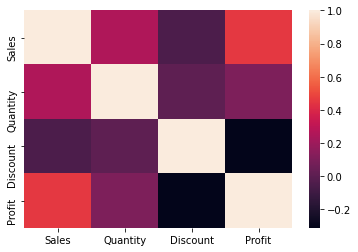

In [ ]:
#Heatmap
sns.heatmap(Retail_df.corr())

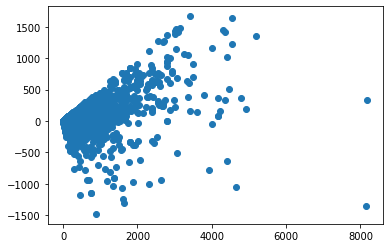

In [ ]:
#Visualizing the correlation between sales and profits generated
plt.scatter(Retail_df['Sales'],Retail_df['Profit'])